In [1]:
# data loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats, integrate

%matplotlib inline
sns.set(color_codes=True)

## Load Data

In [31]:
stim.columns

Index(['index', 'Time', 'visible', 'speed'], dtype='object')

In [39]:
path = '../datasets/preprocessed/'
stim   = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)
stim.head(3)

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0


In [40]:
rat = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
drop_cols =['lVo', 'lx1', 'lz1', 'V1', 'lx2', 'lz2', 'clockwise', 'UM']
rat.drop(labels=drop_cols, axis=1, inplace=True)
rat.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,theta,U
index,,,,,,,,,,,,
1,291,1.212500,-0.019489,0.098921,0.039769,-0.415185,-0.116979,0.780241,0,0.004167,0.016371,225.095621
2,292,1.216667,-0.018301,0.099490,0.041191,-0.401292,-0.115907,0.785460,0,0.004167,0.016686,229.429018
3,293,1.220833,-0.017100,0.100036,0.042615,-0.387157,-0.114871,0.790418,0,0.004166,0.016865,231.951156


## Merge DataFrames

In [ ]:
df = pd.merge(rat, stim, on=['session_id', 'Frame', 'Time'])
df.head()

## Describe Data

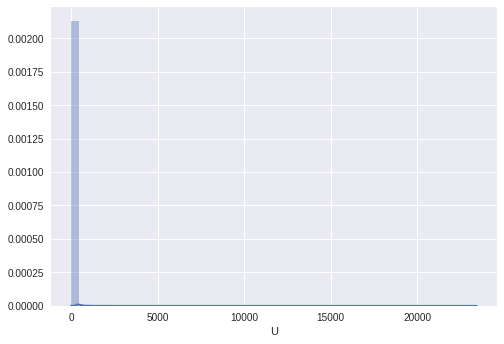

In [67]:
sns.distplot(np.abs(df.U.dropna()))

In [68]:
df.U.describe()

count    761964.000000
mean          0.484015
std          88.546256
min      -23433.466671
25%          -5.240342
50%           0.031137
75%           5.483158
max       19338.170218
Name: U, dtype: float64

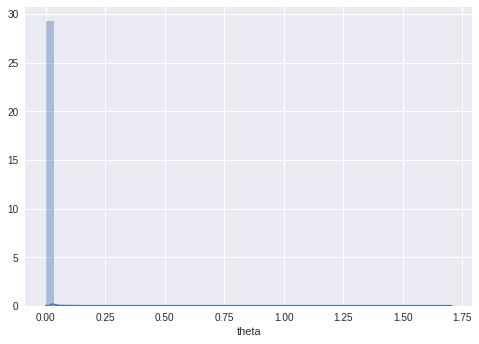

In [70]:
sns.distplot(df_s.theta.dropna())

## Find Rotational Velocity Matches to Stim 

### Extract Rows with Visible, Moving Stimuli

In [55]:
stim_on_mask = (df.speed != 0) & (df.visible == 1)
df_s = df[stim_on_mask]
print('Kept {:.2f}% of data'.format(100 * len(df_s) / len(df)))
df_s.head()

Kept 53.54% of data


,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,dT,theta,U,visible,speed
138,5281,22.004168,0.095665,0.095485,-0.035553,0.875101,-0.011397,-0.214179,0,0.004167,0.008504,116.924466,1,28.0
139,5282,22.008335,0.095456,0.095654,-0.036624,0.874024,-0.006324,-0.221852,0,0.004167,0.008549,117.551849,1,28.0
140,5283,22.012501,0.095254,0.095816,-0.037698,0.872819,-0.001682,-0.229596,0,0.004166,0.008645,118.892507,1,28.0
141,5284,22.016668,0.095065,0.095975,-0.038771,0.871538,0.002758,-0.237383,0,0.004167,0.008698,119.602309,1,28.0
142,5285,22.020835,0.094884,0.096129,-0.039840,0.870169,0.006886,-0.245222,0,0.004167,0.008764,120.505520,1,28.0


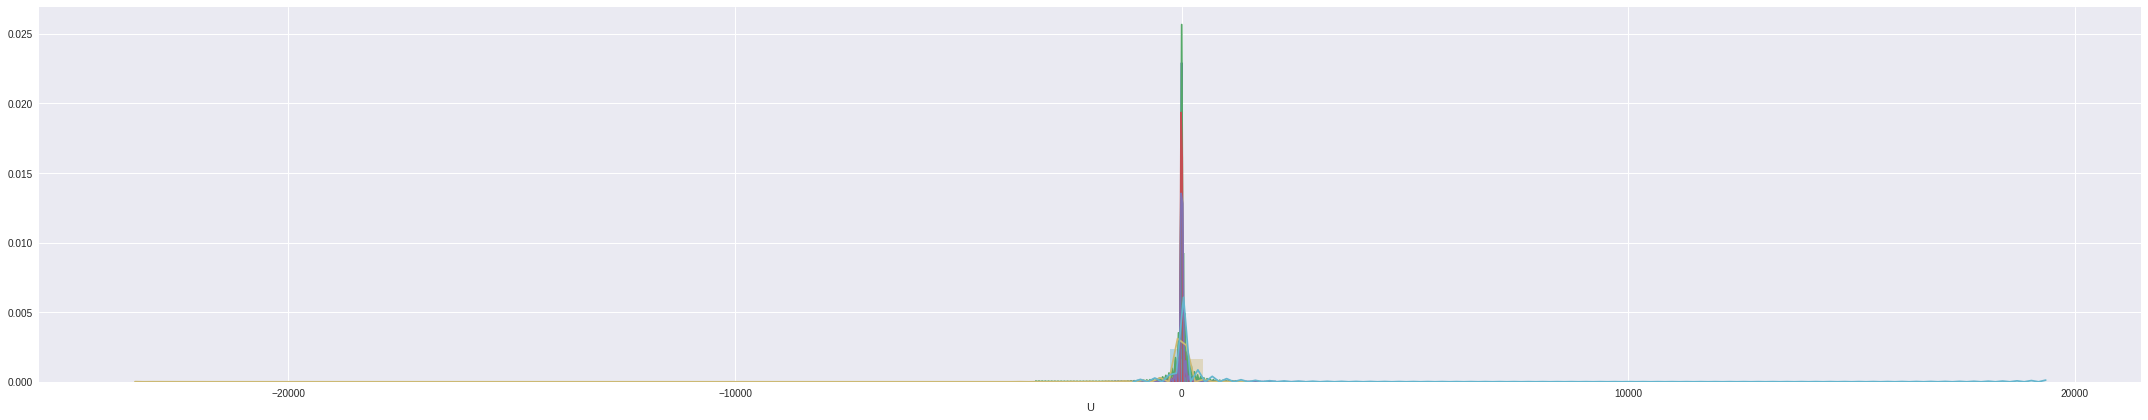

In [59]:
mask = 
g = sns.FacetGrid(data=df_s, size=6, aspect=5, hue='speed')
g.map(sns.distplot, 'U');